<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793927/blob/main/TecMty_Regresion_lineal_polinomial_colaboracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

- Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
- Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Regresión Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
- Finalmente grafica :
-- MAE (de los cuatro métodos)
-- R2 (de los cuatro métodos)
-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
#Nuestras librerias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate


In [ ]:
#La primer division del ejercicio se hace a partir de la linea 23, vamonos para haya

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

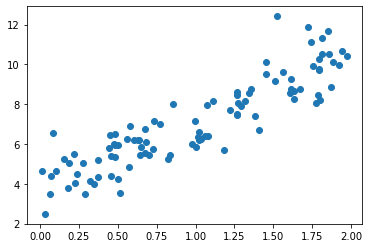

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

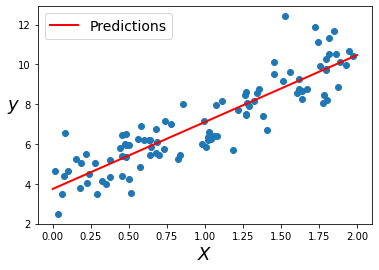

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

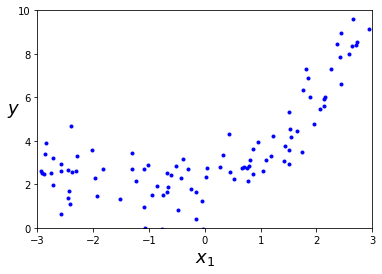

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

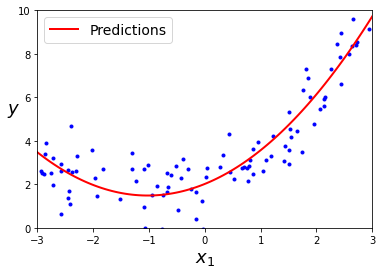

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

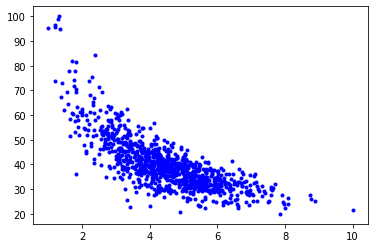

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
#**********************************************************************************************************************************************************************************************
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[] #hagan esto, porque lo necesitaran al final, creanme, de veras
lista_para_r2 =[] #Parentesis tupla, corchete arreglo

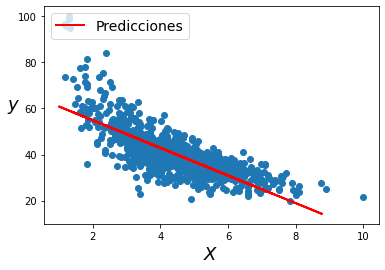

In [ ]:
#**********************************************************************************************************************************************************************************************
# Regresion Lineal opcion de compañera
#modelo generado (ecuación), su visualización, sus errores y r cuadrada.

#La visualización
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#**********************************************************************************************************************************************************************************************
#la ecuacion
linear_reg.coef_, linear_reg.intercept_

#$\hat{y} = -5.98X + 66.83
#La descripcion de la ecuaci[on]
print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

# los errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_para_regresion))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_para_regresion))

El modelo es: Y = [-5.98882699] X + 66.83650741226988
Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
r2_score: 0.6116251549562579


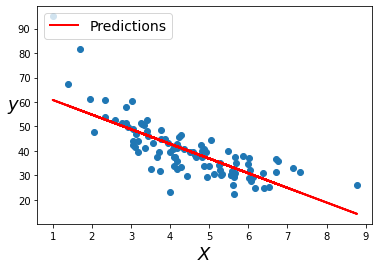

In [ ]:
#**********************************************************************************************************************************************************************************************

#Grafica del compañero
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

X_para_regresion = np.linspace(0, 10, 100)
y_para_regresion = linear_reg.predict(X_test)

plt.scatter(X_test, y_test) #Esta es la diferencia con el anterior, con los puntitos en origen de prueba
plt.plot(X_test, y_para_regresion, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);


De los de arriba vemos que los punticos no impotan, vean la linea, la linea blanca al final del tunel, aunque llega el contra argumento que dicen que esta mas legible con menos puntos, pero llega un derechazo que dice que es como si hiceras un zoom. UStedes anoten lo que quieran al final

In [ ]:
#**********************************************************************************************************************************************************************************************
#polinomial
#calculos
pr = PolynomialFeatures(degree=2, include_bias=False)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
nueva_regresion = LinearRegression()
nueva_regresion.fit(X_train_pr, y_train)
nueva_regresion.intercept_, nueva_regresion.coef_

(88.80179909112496, array([-16.40638102,   1.13136095]))

In [ ]:
#**********************************************************************************************************************************************************************************************
#from sklearn.preprocessing import PolynomialFeatures
#los errores
caracteristicas_para_poly = PolynomialFeatures(degree=2, include_bias=False) #Aqui tenemos que crear las caracteristicas, revisar porque el grado es 2, porque queremos ajustar a un polinomio de segundo raro
#Lo de arriba lo que hace es que los datos originales los va a ir elevando al cuadrado, porque le pusimos 2, pero si juera mas, pues nos va haciendo la potencia
X_polinomial = caracteristicas_para_poly.fit_transform(X_train)
print("Input",caracteristicas_para_poly.n_input_features_)
print("Ouput",caracteristicas_para_poly.n_output_features_)
print("Powersn",caracteristicas_para_poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) #Creamos una 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_


Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


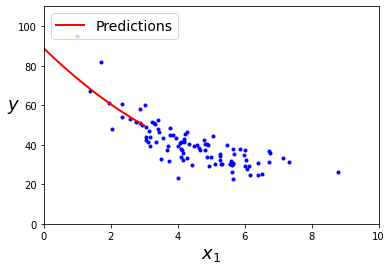

In [ ]:
#**********************************************************************************************************************************************************************************************
#borrar
Xfit = np.linspace(0, 3, 100).reshape(100, 1)
Xfit_p= caracteristicas_para_poly.transform(Xfit)
yfitp = regresion_lineal_poli.predict(Xfit_p) #salida
plt.plot(X_test, y_test, "b.")
plt.plot(Xfit, yfitp, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 110]);

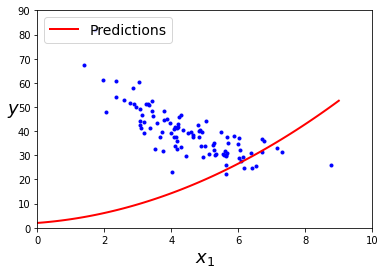

In [ ]:
#**********************************************************************************************************************************************************************************************
#Borrar
'''X_new=np.linspace(0, 9, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_test, y_test, "b.")
plt.plot(X_new.reshape(-1), y_new.reshape(-1), "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);
'''

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


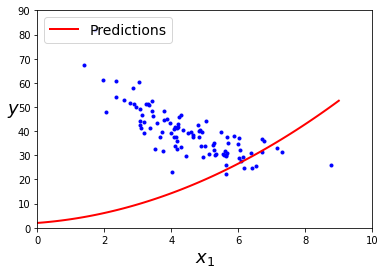

In [ ]:
#**********************************************************************************************************************************************************************************************
# grafica
X_desconocida=np.linspace(0, 9, 100).reshape(100, 1) #esta desonocida solo tendra 100 valores entre 0 y 9., no es nada importante
X_para_poli = caracteristicas_para_poly.transform(X_desconocida)
y_con_regresion_poli = lin_reg.predict(X_para_poli)

plt.plot(X_test, y_test, "b.") #Estamos ploteando sobre datos de prueba
plt.plot(X_desconocida.reshape(-1), y_con_regresion_poli.reshape(-1), "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);


In [ ]:
#**********************************************************************************************************************************************************************************************
#Los errores
from sklearn import metrics
from sklearn.metrics import r2_score


#La ecuacion de la poli
#T0he model estimates : $\hat{y} =  -16.40X +1.31X^2 + 88.80$

print('El modelo es: Y =', lin_reg.coef_[1],'X^2 +', lin_reg.coef_[0],'X +',lin_reg.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)
#mae_list.append(mae) esto no, eso es del compa;ero que nos los paso, no sean copiones
r2Score = r2_score(y_test, y_con_regresion_poli)
#r2_list.append(r2Score) esto tampoco, es del metodo avanzado del compa;ero
print('Error medio Absoluto (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)))
print('r2_score',r2Score)


IndexError: ignored

In [ ]:
#**********************************************************************************************************************************************************************************************

#No le den play a este renglon
'''poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_
X_new= X_train
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100])'''

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_test)))
print('r2_score',r2_score(y, y_test))

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

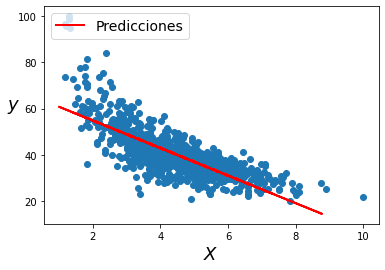

In [ ]:
#**********************************************************************************************************************************************************************************************
#Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
#class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)[source]¶

mi_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)


Error medio Absoluto (MAE): 5.0162057389928325
Root Mean Squared Error: 7.1111119498200965
r2_score 0.6113903530239646
El modelo es: Y = [-5.97003397] X + 66.75243237759665


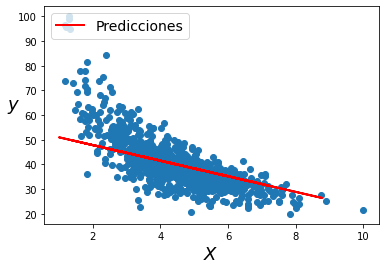

In [ ]:
#Ahora vamos con el lasso
#class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')[source]

mi_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_lasso = mi_lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);


#El lasso castiga mas a las coeficientes de las variables, en comparacion con el ridge

In [ ]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)


Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377413


In [ ]:
#Aqui ojo, porque el append, va a appendar tantas veces como corramos cada celda, y tenemos quer evisar que nos de solamente los 4 que queremos
print(lista_para_mae)
print(lista_para_r2)

[5.013587781954963, 5.0162057389928325, 5.681207654677401]
[0.6116251549562579, 0.6113903530239646, 0.456505036516648]


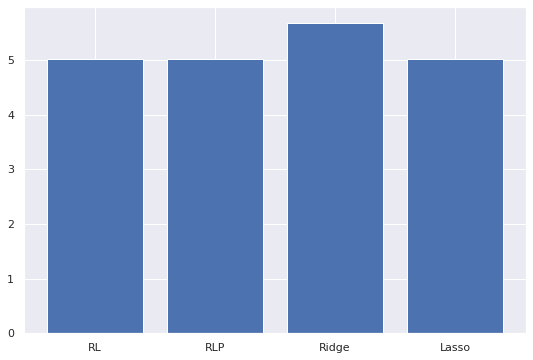

In [ ]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.show()


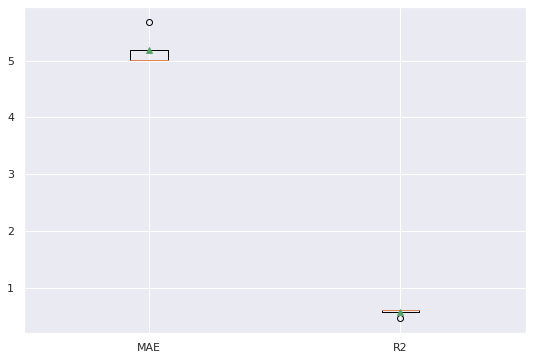

In [ ]:
#Aqui vamos a hacer una grafica de barras o histograma para poder ver esto
#Avui vamos aponer el histograma manan

nombres=list()
nombres.append('MAE')
nombres.append('R2')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,6)})
error_list = list()
error_list.append(lista_para_mae)
error_list.append(lista_para_r2)

plt.boxplot(error_list, labels=nombres, showmeans=True)
plt.show()


In [ ]:
#R2 (de los cuatro métodos)